#Hierarchical Clustering

##Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# Read in data as DataFrame
EastWestAirlines_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/EastWestAirlines.xlsx')

# Drop ID# input feature
EastWestAirlines_df = EastWestAirlines_df.drop(columns='ID#')

# Normalize using Min-Max normalization
MMScaler = MinMaxScaler()
EastWestAirlines_MMScaled = MMScaler.fit_transform(EastWestAirlines_df)

##Dendrogram

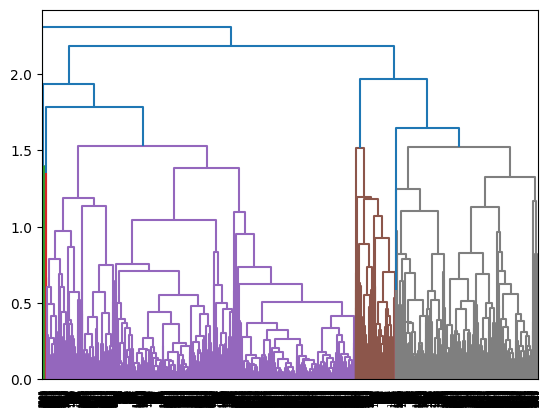

In [ ]:
dendrogram1 = dendrogram(linkage(EastWestAirlines_MMScaled, method='complete'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

AggCluster = AgglomerativeClustering(n_clusters=2)
AggCluster.fit_predict(EastWestAirlines_MMScaled)

array([0, 0, 0, ..., 1, 0, 0])

##PCA

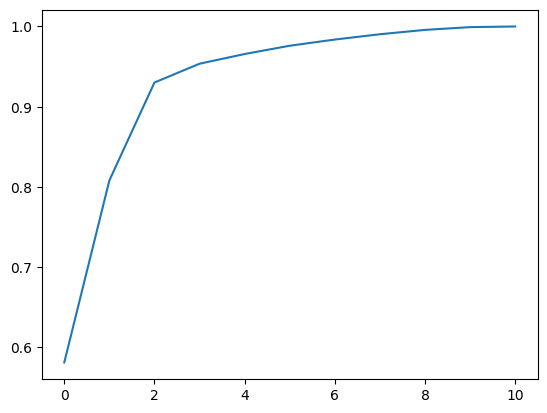

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# PCA using all principle components
pca = PCA()
pca.fit(EastWestAirlines_MMScaled)

# PCA using 2 principle components
pca2 = PCA(n_components=2)
EastWestAirlines_pca2 = pca2.fit_transform(EastWestAirlines_MMScaled)

plt.plot(np.cumsum(pca.explained_variance_ratio_))

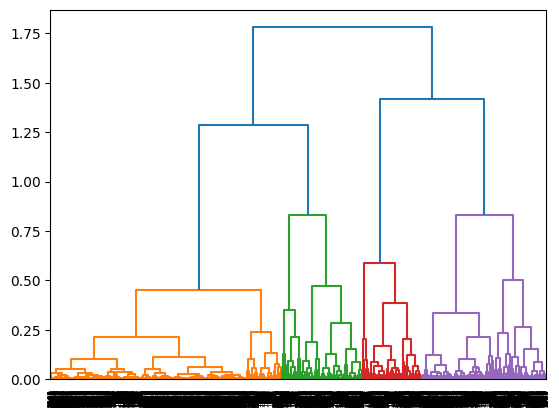

In [ ]:
dendrogram2 = dendrogram(linkage(EastWestAirlines_pca2, method='complete'))

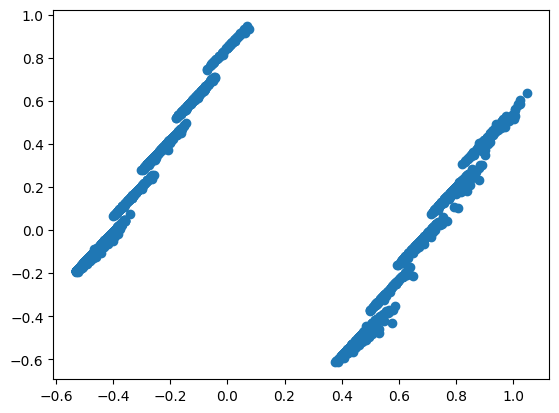

In [ ]:
plt.scatter(EastWestAirlines_pca2[:,0], EastWestAirlines_pca2[:,1])

#K-means Clustering

Text(0, 0.5, 'Inertia')

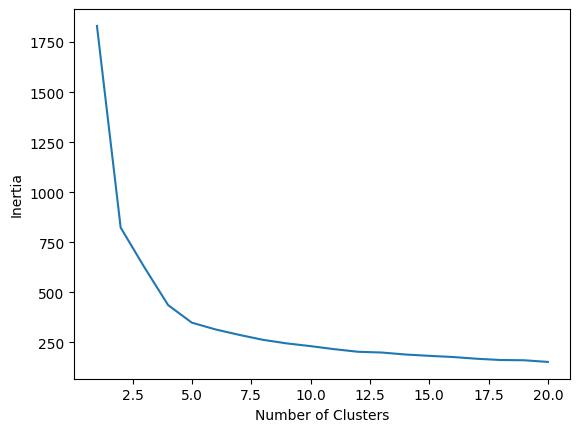

In [ ]:
from sklearn.cluster import KMeans

inertias, clusters = [], range(1, 21)

# Clusters from 1 to 20
for i in clusters:
  kmeans = KMeans(n_clusters=i, random_state=2, n_init=10)
  kmeans.fit(EastWestAirlines_MMScaled)
  inertias.append(kmeans.inertia_)

plt.plot(clusters, inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

In [ ]:
kmeans2 = KMeans(n_clusters=2, random_state=2, n_init=10)
kmeans2.fit(EastWestAirlines_MMScaled)
kmeans2.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int32)

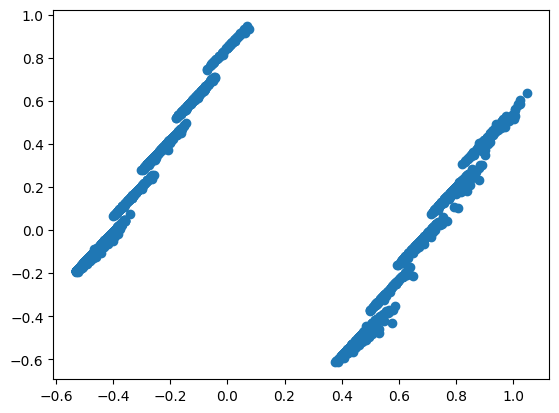

In [ ]:
plt.scatter(EastWestAirlines_pca2[:,0], EastWestAirlines_pca2[:,1])

#Naive Bayes Classification

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/adult.data', header=None)

df.columns = ['age', 'workclass', 'fnlwgt', 'education',
              'education_num', 'Marital status', 'occupation',
              'relationship', 'race', 'sex', 'capitalgain',
              'capitalloss', 'hoursperweek', 'native', 'Salary']

categorical_features = ['workclass', 'education', 'Marital status',
                        'occupation', 'relationship', 'race', 'sex',
                        'native', 'Salary']
df

,age,workclass,fnlwgt,education,education_num,Marital status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
from sklearn.model_selection import train_test_split

# Split DataFrame into training and testing sets
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

# Replace missing categorical variables with mode of category
for category in categorical_features:
    mode = X_train[category].mode()[0]
    X_train[category].replace(' ?', pd.NA, inplace=True)
    X_test[category].replace(' ?', pd.NA, inplace=True)
    X_train[category].fillna(mode, inplace=True)
    X_test[category].fillna(mode, inplace=True)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

OHE = OneHotEncoder(sparse_output=False)

# Fit One Hot Encoder to categorical features
X_train_OHE = OHE.fit_transform(X_train[categorical_features])
X_test_OHE = OHE.transform(X_test[categorical_features])

# Turn into DataFrame
X_train_OHE_df = pd.DataFrame(X_train_OHE, columns=OHE.get_feature_names_out(categorical_features))
X_test_OHE_df = pd.DataFrame(X_test_OHE, columns=OHE.get_feature_names_out(categorical_features))

# Combine One Hot encoded variables with previous variables
X_train_OHE_num = pd.concat([X_train.drop(columns=categorical_features).reset_index(drop=True), X_train_OHE_df], axis=1)
X_test_OHE_num = pd.concat([X_test.drop(columns=categorical_features).reset_index(drop=True), X_test_OHE_df], axis=1)

In [ ]:
from sklearn.preprocessing import RobustScaler

# Set target variable as Salary > 50K
y_train = X_train_OHE_num['Salary_ >50K']
y_test = X_test_OHE_num['Salary_ >50K']

RobScaler = RobustScaler()

# Remove target variables from features and scale them
X_train_Scaled = RobScaler.fit_transform(X_train_OHE_num.drop(columns=['Salary_ <=50K', 'Salary_ >50K'], axis=1))
X_test_Scaled = RobScaler.transform(X_test_OHE_num.drop(columns=['Salary_ <=50K', 'Salary_ >50K'], axis=1))

               precision    recall  f1-score   support

Salary <= 50K       0.93      0.80      0.86      4942
 Salary > 50K       0.57      0.82      0.67      1571

     accuracy                           0.80      6513
    macro avg       0.75      0.81      0.77      6513
 weighted avg       0.85      0.80      0.82      6513



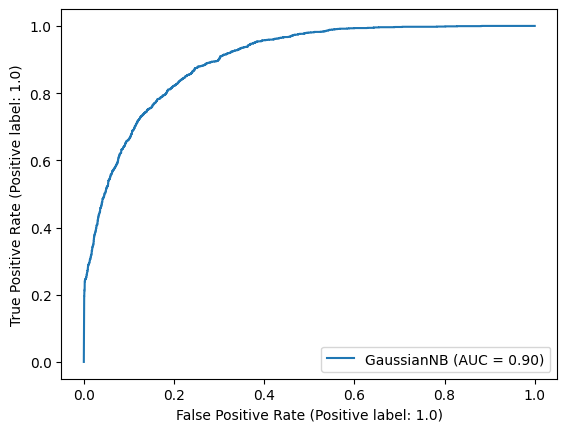

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay, confusion_matrix

# Gaussian Naive Bayes
GNB = GaussianNB()
GNB.fit(X_train_Scaled, y_train)
y_pred = GNB.predict(X_test_Scaled)

print(classification_report(y_test, y_pred, target_names=['Salary <= 50K', 'Salary > 50K']))
RocCurveDisplay.from_estimator(GNB, X_test_Scaled, y_test)

Class Probabilities:
 [[9.99997644e-01 2.35615103e-06]
 [1.21008904e-01 8.78991096e-01]
 [3.27678574e-02 9.67232143e-01]
 ...
 [0.00000000e+00 1.00000000e+00]
 [9.99988502e-01 1.14983064e-05]
 [9.99999936e-01 6.38100867e-08]]


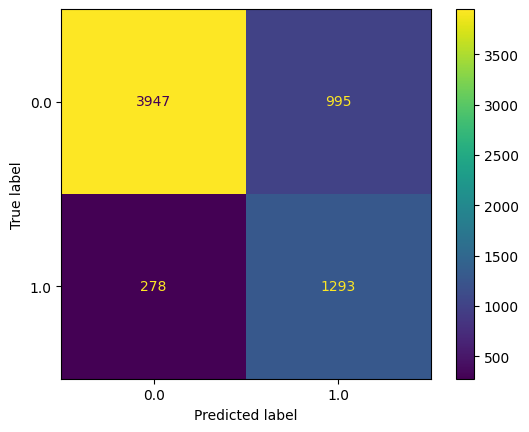

In [ ]:
ConfusionMatrixDisplay.from_estimator(GNB, X_test_Scaled, y_test)
print("Class Probabilities:\n", GNB.predict_proba(X_test_Scaled))

#k Nearest Neighbors (kNN)

<ipython-input-20-b11b595ee6e8>:10: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  hist = bcw_df.hist(ax=ax, bins=10, grid=False)


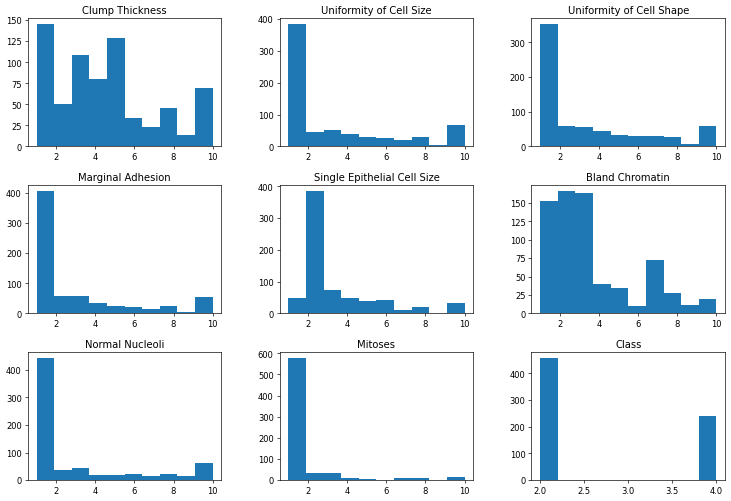

In [ ]:
bcw_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/breast-cancer-wisconsin.data")

bcw_df.columns = ['id number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                  'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                  'Normal Nucleoli', 'Mitoses', 'Class']
# Remove id number
bcw_df = bcw_df.drop(columns='id number')
# Distribution of Data
fig, ax = plt.subplots(figsize=(15,10), dpi=60)
hist = bcw_df.hist(ax=ax, bins=10, grid=False)

<Axes: >

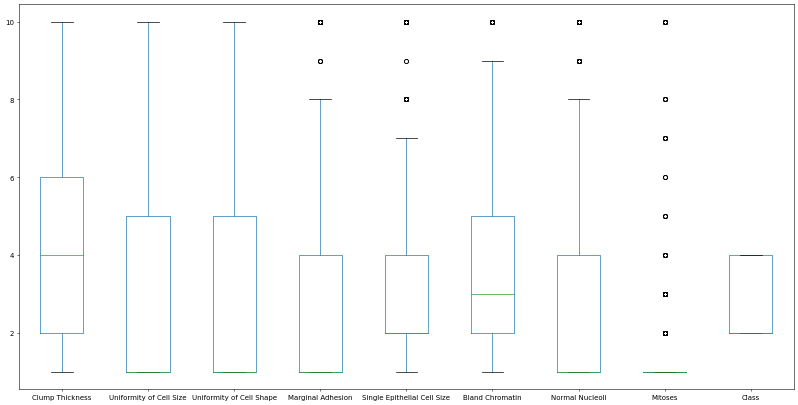

In [ ]:
fig, ax = plt.subplots(figsize=(20,10), dpi=50)
bcw_df.boxplot(ax=ax, grid=False)

In [ ]:
# Replace '?' with NaN and then replace that with median value of category
for category in bcw_df.columns:
  bcw_df[category].replace('?', pd.NA, inplace=True)
  bcw_df[category].fillna(bcw_df[category].median(), inplace=True)

# Set Class as target variable
X_train_bcw, X_test_bcw, y_train_bcw, y_test_bcw = train_test_split(bcw_df.drop(columns='Class'), bcw_df['Class'],
                                                                    test_size=0.2, random_state=42)

<ipython-input-23-a7543c1ae263>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(bcw_df.corr(), annot=True, cmap='coolwarm')


Text(0.5, 1.0, 'Correlation Heatmap')

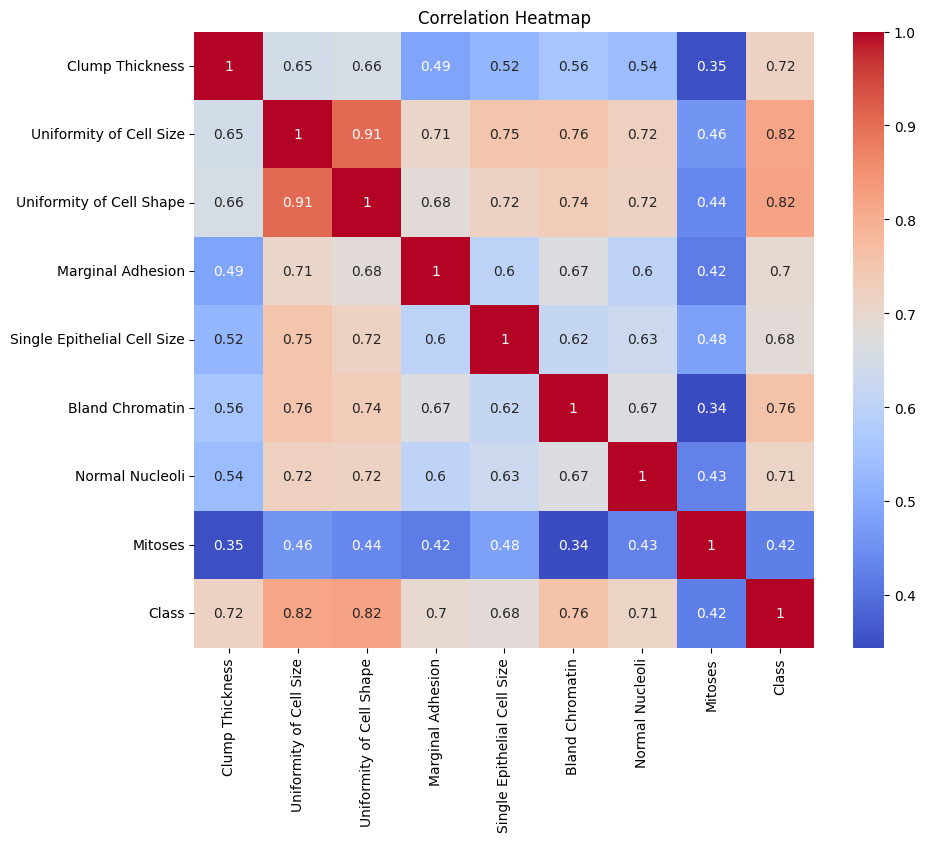

In [ ]:
import seaborn as sns

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(bcw_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale training and testing sets
SScaler = StandardScaler()
X_train_bcw_scaled = SScaler.fit_transform(X_train_bcw)
X_test_bcw_scaled = SScaler.transform(X_test_bcw)

Text(0, 0.5, 'Accuracy')

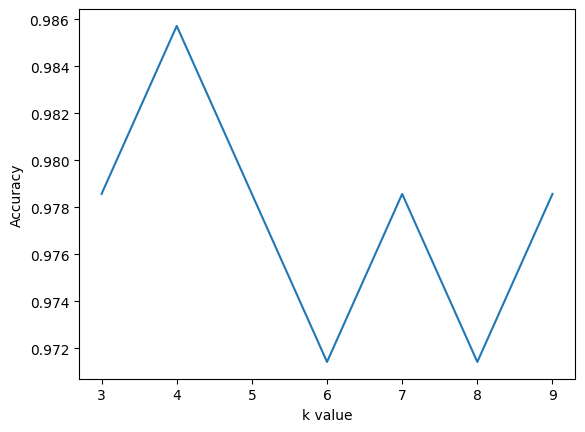

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_range = range(3, 10)
accuracy = []

for i in k_range:
  knc = KNeighborsClassifier(n_neighbors=i)
  knc.fit(X_train_bcw_scaled, y_train_bcw)
  accuracy.append(accuracy_score(y_test_bcw, knc.predict(X_test_bcw_scaled)))

plt.plot(k_range, accuracy)
plt.xlabel('k value')
plt.ylabel('Accuracy')

In [ ]:
# k value of 4 is highest accuracy from graph
knc4 = KNeighborsClassifier(n_neighbors=4)
knc4.fit(X_train_bcw_scaled, y_train_bcw)
y_pred = knc4.predict(X_test_bcw_scaled)

print(classification_report(y_pred, y_test_bcw, target_names=['benign', 'malignant']))

              precision    recall  f1-score   support

      benign       0.98      1.00      0.99        87
   malignant       1.00      0.96      0.98        53

    accuracy                           0.99       140
   macro avg       0.99      0.98      0.98       140
weighted avg       0.99      0.99      0.99       140



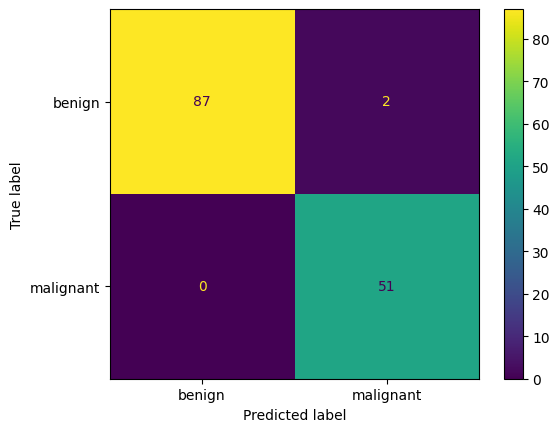

In [ ]:
ConfusionMatrixDisplay.from_estimator(knc4, X_test_bcw_scaled, y_test_bcw,display_labels=['benign', 'malignant'])

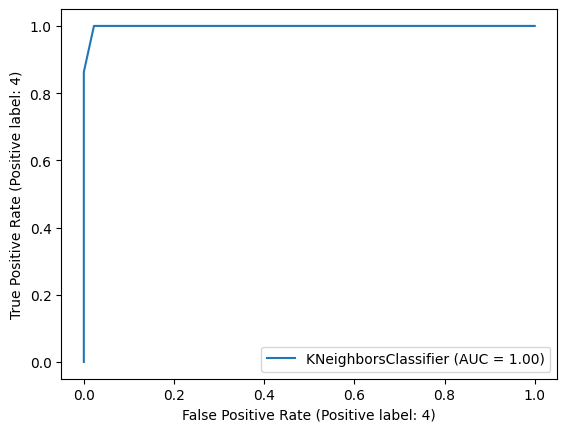

In [ ]:
RocCurveDisplay.from_estimator(knc4, X_test_bcw_scaled, y_test_bcw)

#Support Vector Machines (SVM)

Data points in each class:
0    16259
1     1639
Name: target_class, dtype: int64

Percentage of data points in each class:
0    0.908426
1    0.091574
Name: target_class, dtype: float64


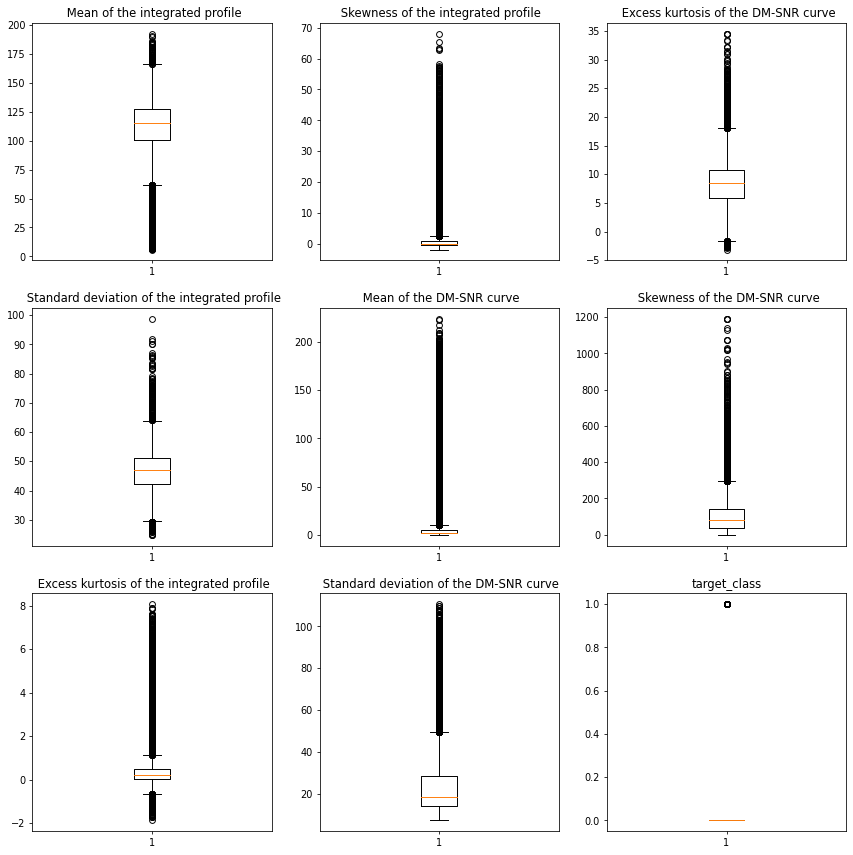

In [ ]:
pulsar_stars_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/pulsar_stars.csv")

# Boxplots of all variables
fig, ax = plt.subplots(figsize=(15, 15), dpi=70, nrows=3, ncols=3)
for i in range(9):
    ax[i%3,int(i/3)].boxplot(pulsar_stars_df[pulsar_stars_df.columns[i]])
    ax[i%3,int(i/3)].set_title(pulsar_stars_df.columns[i])

print("Data points in each class:\n", pulsar_stars_df['target_class'].value_counts(), sep='')
print("\nPercentage of data points in each class:\n",
      pulsar_stars_df['target_class'].value_counts()/len(pulsar_stars_df['target_class']),sep='')

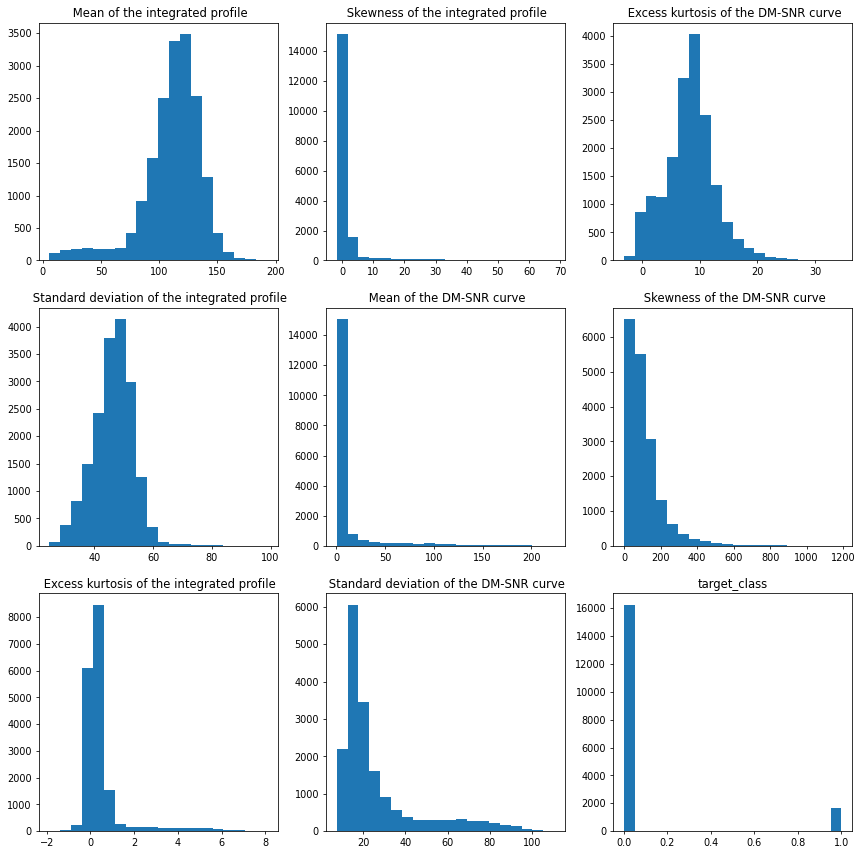

In [ ]:
# Histograms of all variables
fig, ax = plt.subplots(figsize=(15, 15), dpi=70, nrows=3, ncols=3)
for i in range(9):
    ax[i%3,int(i/3)].hist(pulsar_stars_df[pulsar_stars_df.columns[i]], bins=20)
    ax[i%3,int(i/3)].set_title(pulsar_stars_df.columns[i])

In [ ]:
X_train_ps, X_test_ps, y_train_ps, y_test_ps = train_test_split(pulsar_stars_df.drop(columns='target_class'),
                                                                pulsar_stars_df['target_class'], test_size=0.2,
                                                                random_state=42)
# Dont scale target variable because already 0-1 binary classifier
SScaler_ps = StandardScaler()
X_train_ps_scaled = SScaler_ps.fit_transform(X_train_ps)
X_test_ps_scaled = SScaler_ps.transform(X_test_ps)

In [ ]:
from sklearn.svm import SVC

kernel, C = ['rbf', 'linear', 'poly', 'sigmoid'], [1, 10, 100]

for k in kernel:
  for c in C:
    clf = SVC(kernel=k, C=c)
    clf.fit(X_train_ps_scaled, y_train_ps)
    y_pred_ps = clf.predict(X_test_ps_scaled)
    print(k, c, "accuracy:", np.round(accuracy_score(y_test_ps, y_pred_ps),3))

rbf 1 accuracy: 0.98
rbf 10 accuracy: 0.98
rbf 100 accuracy: 0.982
linear 1 accuracy: 0.979
linear 10 accuracy: 0.979
linear 100 accuracy: 0.979
poly 1 accuracy: 0.978
poly 10 accuracy: 0.98
poly 100 accuracy: 0.98
sigmoid 1 accuracy: 0.875
sigmoid 10 accuracy: 0.875
sigmoid 100 accuracy: 0.875


In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = [ {'C':[1, 5, 10, 20, 50, 100], 'kernel':['linear']},
               {'C':[1, 5, 10, 20, 50, 100], 'kernel':['rbf'], 'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]},
               {'C':[1, 5, 10, 20, 50, 100], 'kernel':['poly'], 'degree':[2,3,4], 'gamma':[0.01,0.02,0.03,0.04,0.05]}
              ]
GSearch = GridSearchCV(estimator=SVC(), param_grid=parameters, scoring='accuracy', n_jobs=-1)
GSearch.fit(X_train_ps_scaled, y_train_ps)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 5, 10, 20, 50, 100], 'kernel': ['linear']},
                         {'C': [1, 5, 10, 20, 50, 100],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 5, 10, 20, 50, 100], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

Best Score: 0.9800252743049933
Best Parameters {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3259
           1       0.94      0.84      0.89       321

    accuracy                           0.98      3580
   macro avg       0.96      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580



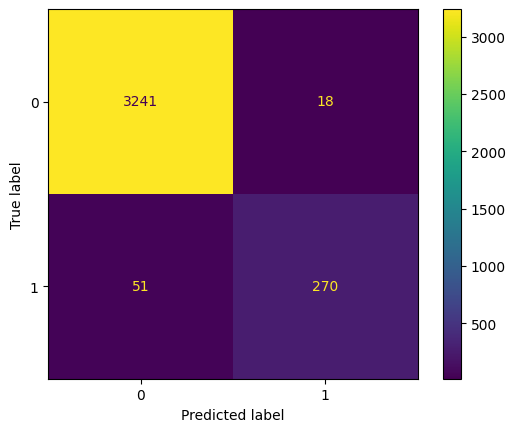

In [ ]:
print("Best Score:", GSearch.best_score_)
print("Best Parameters", GSearch.best_params_)

clf = SVC(kernel='rbf', C=100, gamma=0.1)
clf.fit(X_train_ps_scaled, y_train_ps)
y_pred_ps = clf.predict(X_test_ps_scaled)
print(classification_report(y_test_ps, y_pred_ps))
ConfusionMatrixDisplay.from_estimator(clf, X_test_ps_scaled, y_test_ps)

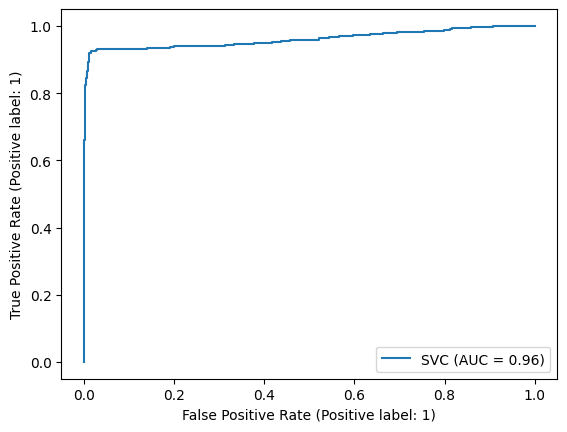

In [ ]:
RocCurveDisplay.from_estimator(clf, X_test_ps_scaled, y_test_ps)

#Feed Forward Multilayer Perceptron

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

def build_classifier(l1, l2, l3, optimizer):
  classifier = Sequential()
  classifier.add(Dense(l1, input_shape=(8,), activation='relu'))
  classifier.add(Dense(l2, 'relu'))
  classifier.add(Dense(l3, 'relu'))
  classifier.add(Dense(1, 'sigmoid'))
  classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  return classifier

In [ ]:
parameters = {'batch_size': [10, 25],
              'l1': [8, 16],
              'l2': [8, 16],
              'l3': [8, 16],
              'optimizer': ['adam', 'sgd']}
np.random.seed(42)
classifier = KerasClassifier(build_classifier)
grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_ps_scaled, y_train_ps)

<ipython-input-37-ffe5a8d0147d>:7: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasClassifier(build_classifier)
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


1432/1432 [==============================] - 3s 2ms/step - loss: 0.1151 - accuracy: 0.9703


GridSearchCV(estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7efec062fdf0>,
             n_jobs=-1,
             param_grid={'batch_size': [10, 25], 'l1': [8, 16], 'l2': [8, 16],
                         'l3': [8, 16], 'optimizer': ['adam', 'sgd']},
             scoring='accuracy')

In [ ]:
print("Best Score:", grid_search.best_score_)
print("Best Parameters:", grid_search.best_params_)

best_classifier = build_classifier(16, 16, 8, 'adam')
best_classifier.fit(X_train_ps_scaled, y_train_ps, batch_size=10, epochs=100, validation_split=0.2, verbose=0)

Best Score: 0.978279317901096
Best Parameters: {'batch_size': 10, 'l1': 16, 'l2': 16, 'l3': 8, 'optimizer': 'adam'}


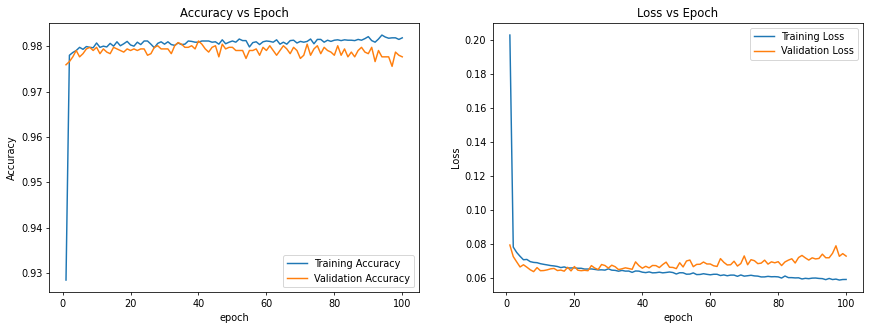

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), dpi=70)
ax[0].plot(range(1, 101), best_classifier.history.history['accuracy'], label='Training Accuracy')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('Accuracy')

ax[0].plot(range(1, 101), best_classifier.history.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Accuracy vs Epoch')
ax[0].legend()

ax[1].plot(range(1, 101), best_classifier.history.history['loss'], label='Training Loss')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('Loss')

ax[1].plot(range(1, 101), best_classifier.history.history['val_loss'], label='Validation Loss')
ax[1].set_title('Loss vs Epoch')
ax[1].legend()

112/112 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3259
           1       0.93      0.85      0.89       321

    accuracy                           0.98      3580
   macro avg       0.96      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580



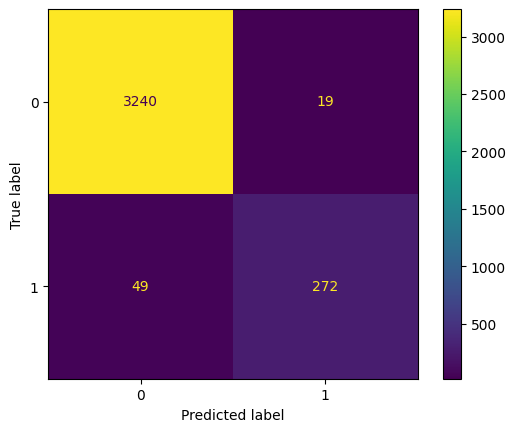

In [ ]:
y_pred = (best_classifier.predict(X_test_ps_scaled) > 0.5).astype(int)
print(classification_report(y_test_ps, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test_ps, y_pred)

In [ ]:
from keras.layers import Dropout

def build_classifier_dropout(l1, l2, l3, optimizer):
  classifier = Sequential()
  classifier.add(Dense(l1, input_shape=(8,), activation='relu'))
  classifier.add(Dropout(0.1))
  classifier.add(Dense(l2, 'relu'))
  classifier.add(Dropout(0.1))
  classifier.add(Dense(l3, 'relu'))
  classifier.add(Dropout(0.1))
  classifier.add(Dense(1, 'sigmoid'))
  classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  return classifier

np.random.seed(42)
classifier_dropout = KerasClassifier(build_classifier_dropout)
grid_search_dropout = GridSearchCV(estimator=classifier_dropout, param_grid=parameters, scoring='accuracy', verbose=0, n_jobs=-3)
grid_search_dropout.fit(X_train_ps_scaled, y_train_ps)

<ipython-input-41-8d2401b5110a>:16: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier_dropout = KerasClassifier(build_classifier_dropout)


1432/1432 [==============================] - 4s 2ms/step - loss: 0.1722 - accuracy: 0.9591


GridSearchCV(estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7efebe1b7610>,
             n_jobs=-3,
             param_grid={'batch_size': [10, 25], 'l1': [8, 16], 'l2': [8, 16],
                         'l3': [8, 16], 'optimizer': ['adam', 'sgd']},
             scoring='accuracy')

In [ ]:
print("Best Score:", grid_search_dropout.best_score_)
print("Best Parameters:", grid_search_dropout.best_params_)

best_classifier_dropout = build_classifier_dropout(16, 16, 8, 'adam')
best_classifier_dropout.fit(X_train_ps_scaled, y_train_ps, batch_size=10, epochs=100, validation_split=0.2, verbose=0,)

Best Score: 0.9776506555416147
Best Parameters: {'batch_size': 10, 'l1': 16, 'l2': 8, 'l3': 8, 'optimizer': 'adam'}


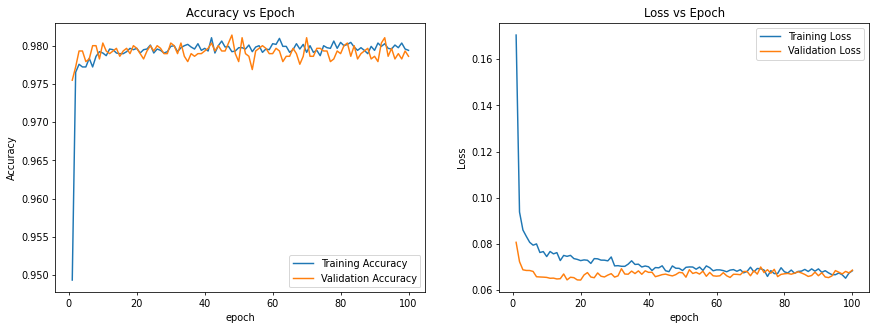

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), dpi=70)
ax[0].plot(range(1, 101), best_classifier_dropout.history.history['accuracy'], label='Training Accuracy')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('Accuracy')

ax[0].plot(range(1, 101), best_classifier_dropout.history.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Accuracy vs Epoch')
ax[0].legend()

ax[1].plot(range(1, 101), best_classifier_dropout.history.history['loss'], label='Training Loss')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('Loss')

ax[1].plot(range(1, 101), best_classifier_dropout.history.history['val_loss'], label='Validation Loss')
ax[1].set_title('Loss vs Epoch')
ax[1].legend()

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3259
           1       0.93      0.85      0.89       321

    accuracy                           0.98      3580
   macro avg       0.96      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580



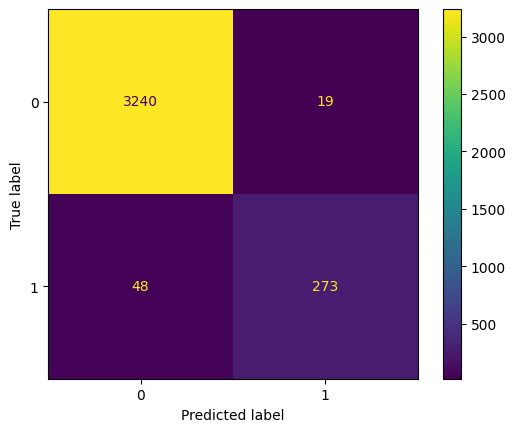

In [ ]:
y_pred = (best_classifier_dropout.predict(X_test_ps_scaled, verbose=0) > 0.5).astype(int)
print(classification_report(y_test_ps, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test_ps, y_pred)